# Proyecto: Análisis del mercado inmobiliario de la Ciudad de Buenos Aires

Mentor: Javier Lezama.

javitolez@gmail.com

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal www.Properati.com.ar.

# El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 


# Los atributos


A continuación vamos a describir los atributos que consideramos en esta muestra:

* id: id de la propiedad
* created_on: fecha en la que la propiedad ingresó al sitio
* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

# Manos a la obra

Primero Importaremos las librerias necesarias para poder cargar el dataset. 

Para eso trabajaremos con las librerias vistas en las primeras clases de la diplomatura:

Nunpy

Pandas

Matplotlib.pyplot

Seaborn

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


# Cargando dataset de propiedades

Cargár el dataset para comenzar a trabajar. Utilizar parse_dates sobre la columna created_on.

In [3]:
# cargá el dataset en esta celda
df =pd.read_csv('datos_properati.csv', engine='python', parse_dates = ['created_on'])

In [4]:
df

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.00,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


# Exploración de datos

Parte 1)

Cargar el dataset, describir el tamaño del mismo, calcular los labels, features, de cada columnas.

Mostrar que categorías existen en la siguiente colunma:

property_type

y la cantidad de instancias que hay de cada una.



In [5]:
df.count()

created_on                 18979
operation                  18979
property_type              18979
place_with_parent_names    18979
lat-lon                    18979
lat                        18979
lon                        18979
price_aprox_usd            17445
surface_total_in_m2        16586
surface_covered_in_m2      16876
price_usd_per_m2           16037
floor                       2756
rooms                      13517
expenses                    3815
properati_url              18979
barrio                     18979
comuna                     18979
dtype: int64

In [6]:
df['property_type'].unique()

array(['house', 'store', 'apartment', 'PH'], dtype=object)

In [7]:
df

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.00,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


Parte 2)

# Filtrando categorías

Filtrar el dataframe original creando un nuevo dataframe llamado df_filtered. Este es el dataframe que seguiran usando a lo largo del análisis

De la columna property_type filtrar la misma para quedarse solo con las instancias que sean casas (houses), departamento (apartment) o PH (PH). 

Utilizando seaborn creá un countplot para visualizar las categorías de df_filtered en el campo property_type. 

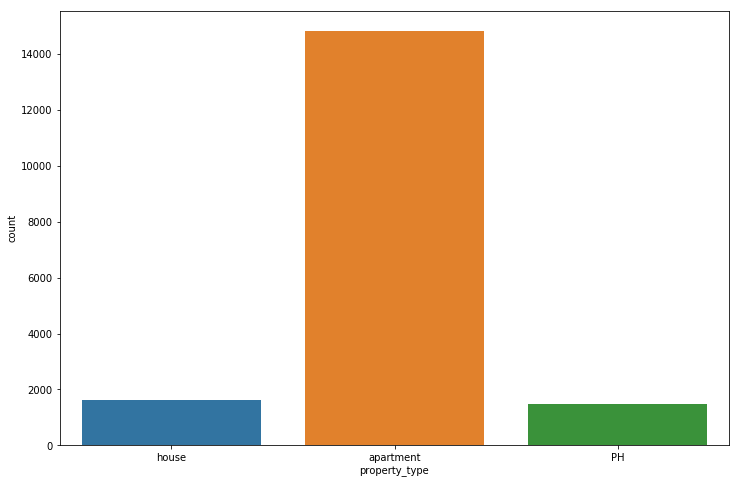

In [8]:
df_filtered = df[(df['property_type'] == 'house') | (df['property_type'] == 'apartment') | (df['property_type'] == 'PH')]

sns.countplot(x='property_type',data=df_filtered)

Parte 3)

# Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.

Estas columnas son las que informan superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado.

Quitar del dataframe las instancias que no tengan ningún valor en los campos nombrados.

A continuación mostrar cuantas instancias son las que se descartaron a partir de quitar las que tenían valores nulos.

Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

Mostrá qué otros atributos tienen valores faltantes en el dataframe.


In [9]:
cols_df = df_filtered.columns
cols_df

Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio', 'comuna'],
      dtype='object')

In [10]:
df_filtered = df_filtered.dropna(subset=['surface_total_in_m2','surface_covered_in_m2','price_aprox_usd','price_usd_per_m2','rooms'])
df_filtered


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.00,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0
30,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,490000.00,100.0,95.0,4900.000000,NaN,4.0,NaN,https://www.properati.com.ar/1e2no_venta_departamento_palermo_gimnasio_lavadero_parrilla_patio_piscina_sum_sauna_electrogeno_garage_tenis_amoblado_amenities_apto-credito-hipotecario_cityprop_fz8,PALERMO,14.0
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,NaN,1.0,NaN,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,PALERMO,14.0
32,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5722218,-58.4211164",-34.572222,-58.421116,2600000.00,400.0,400.0,6500.000000,NaN,5.0,20000.0,https://www.properati.com.ar/1e3ol_venta_departamento_palermo_balcon_suite_lavadero_toilette_vestidor_luminoso_vista_sauna_lujoso_dependencias_garage_placard_covello-propiedades_9ij,PALERMO,14.0
33,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5684721,-58.4312493",-34.568472,-58.431249,520000.00,97.0,97.0,5360.824742,NaN,3.0,10000.0,https://www.properati.com.ar/1e3oo_venta_departamento_palermo_baulera_suite_gimnasio_jardin_lavadero_piscina_sum_garage_impecable_aire-acondicionado_losa-radiante_tovado-propiedades_dk1,PALERMO,14.0
34,2017-08-31,sell,house,|Argentina|Capital Federal|Palermo|Palermo Chico|,"-34.5780733419,-58.4055800042",-34.578073,-58.405580,1975000.00,460.0,400.0,4293.478261,NaN,6.0,NaN,https://www.properati.com.ar/1e403_venta_casa_palermo-chico_castex_3200_suite_jardin_dependencias_electrogeno_garage_impecable_aire-acondicionado_arana-parera-propiedades_h3y,PALERMO,14.0


Contando los valores NaN restantes podemos ver que solo tenemos en la columna 'floor' y 'expenses'

In [11]:
cols_with_na = df_filtered.isna().sum()
cols_with_na

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
floor                      10112
rooms                          0
expenses                    9703
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

# Desafío:

Planteá alguna/s estrategia/s posible para reemplazar los valores faltantes en el atributo surface_total_in_m2. Justificá la/s misma/s.



Una posibilidad sería poner la superficie de la media de departamentos con el mismo precio y precio por metro cuadrado. Aquellos departamentos que tengan mismo precio y precio por metro cuadrado deberían tener la misma superficie por una cuestión matemática.

In [12]:
df_filtered_con_na = df[(df['property_type'] == 'house') | (df['property_type'] == 'apartment') | (df['property_type'] == 'PH')]


Parte 4)

# Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset.

Por ejemplo, la superficie total no puede ser menor que la cubierta. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

Mostrá cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada wrong_surface_rows

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de superficie total con superficie cubierta en caso de que se cumpla la condición mencionada.


Mayor igual ponemos.. desp aclarar y describir el paso a paso.

In [2]:
df_filtered['wrong_surface_rows'] = (df_filtered['surface_total_in_m2'] >= df_filtered['surface_covered_in_m2'])
df_test = df_filtered[df_filtered['wrong_surface_rows'] == False]


NameError: name 'df_filtered' is not defined

In [47]:
df_filtered['surface_covered_in_m2'][df_filtered['wrong_surface_rows'] == False] = df_test['surface_total_in_m2']

df_filtered['surface_total_in_m2'][df_filtered['wrong_surface_rows'] == False] = df_test['surface_covered_in_m2']


C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
df_test_final = df_filtered[df_filtered['wrong_surface_rows'] == False]
df_test_final

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,wrong_surface_rows


In [1]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2']

NameError: name 'df_filtered' is not defined

In [ ]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores
que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el
análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [ ]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento. Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.


In [ ]:
conteo_puntos.name = 'conteo'

df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])

df_filtered = df_filtered[df_filtered.conteo <= 5]

Eliminamos el atributo conteo dado que ya no nos sirve.

In [ ]:
df_filtered.drop('conteo', inplace=True, axis=1)

Parte 5)

# Estudiando los barrios

# Barrios con más edificios y barrios con más casas

Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos
una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. Para eso vamos a empezar
calculando los porcentajes de cada tipo de propiedad según el barrio.

In [ ]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values

In [ ]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [ ]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos en forma de torta.

In [ ]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

# Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que
consideremos extremos.

Tomando el atributo price_usd_per_m2 calculá su mínimo, máximo, promedio (mean), mediana (median) y desvío estándar (std).

También podemos calcular otros estadísticos como los cuartiles.

Mostrá el primer y tercer cuartil y luego también el rango intercuartilíco.


In [ ]:
df_price = df_filtered['price_usd_per_m2'].describe()
df_price

In [ ]:
df_price_q1 = df_filtered['price_usd_per_m2'].quantile(0.25)
df_price_q3 = df_filtered['price_usd_per_m2'].quantile(0.75)
df_iqr = df_price_q3 - df_price_q1

print("Q1: \n", df_price_q1)
print("Q2: \n", df_price_q3)
print("El rango interquartil: \n", df_iqr)
#print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

In [ ]:
#plt.figure(figsize=(10,6))
sns.distplot(df_filtered['price_usd_per_m2'].dropna())

# Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [ ]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.
Volvér a calcular los mismos estadísticos (min, max, promedio, etc) para ver los cambios. ¿Por qué será que la mediana no cambia?

Vamos a graficar ahora los barrios según el precio por metro cuadrado.

In [ ]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Más caros

In [ ]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

#### Más baratos

In [ ]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

# Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:

* Superficie total en m2

* Cuartos totales 

* Precio en dolares por m2


In [ ]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

# Desafío:

En cada uno de los tres gráficos realizados en el punto anterior. Responder:

La distribución coincide con algunas vistas en clases. ¿Porque?. Analizar si presentan algún sesgo, achatamiento, escalonado, etc.

# Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota (blog), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.
Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo place_with_parent_names, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada barrio_publicado.

De este modo, lo que vamos a analizar es como se relacionan las columnas barrio y barrio publicado. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por |. Por ejemplo, en |Argentina|Capital Federal|Palermo| vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo).

De este modo, una estrategia posible para resolver esto es separar las jerarquías por | y extraer el elemento asociado al barrio. Por ejemplo, para |Argentina|Capital Federal|Palermo| queda ['', 'Argentina', 'Capital Federal', 'Palermo', '']. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.


In [ ]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

Como algunos tienen 4 elementos, debemos quitarlos.

In [ ]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [ ]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [ ]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

# Desafío 

Realizar una tabla de doble entrada para identificar para cada barrio cuál es al que más quiere parecerse. ¿Que concluiones podemos sacar?

Ayuda:

In [ ]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

# Desafío

Analizar si hay correlaciones entre las variables surface_total_in_m2, rooms y price.

¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Por qué?

Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.


# Informe final

Presentar un informe final con los datos inferidos del dataset utilizando herramientas gráficas y escritas teniendo en cuenta los destinatarios. En este caso colegas de la diplomatura para preparar el informe con un background adecuado al destinatario.